## Predicting fake jobs ads

### Visualizing the data

In [89]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sn

In [1]:
dl_train=pd.read_csv('./x_train.csv')
dl_train.head()

NameError: name 'pd' is not defined

fraudulent: corresponds to the desired feature to be predicted. (0: non-fraudulent, 1: fraudulent)

In [6]:
dl_ex=pd.read_csv('./example.csv')
dl_ex.head()

,Id,Category
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1


In [7]:
dl_test=pd.read_csv('./test.csv')
dl_test.head()

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,doughnuts_comsumption
0,0,14155,Home Based Typist/ Data Entry Clerk,"ZA, WC, Oudtshoorn",NaN,NaN,NaN,We have several openings available in this are...,Applicants should have a computer with interne...,"Averaging R2,500 per week depending on if you ...",0,0,0,NaN,NaN,NaN,NaN,NaN,1.763896
1,1,6567,Call Center Representative I,"US, TX, AUSTIN",CALL CENTER,28000-32000,As the industry’s largest supply contracting c...,The Call Center Representative I will provide ...,1-2 years customer serviceExcellent communicat...,competitive salaries and comprehensive benefit...,0,1,1,Full-time,Associate,High School or equivalent,Consumer Services,Customer Service,0.285890
2,2,5930,Chief Accountant,"RO, B, Bucharrest",Accounting,NaN,At The Practice Group (TPG) we provide clients...,TPG is searching a Chief Accountant for one of...,Good knowledge of SAPFluency in EnglishUnivers...,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting,Accounting/Auditing,-0.700898
3,3,11085,Office Services Associate,"US, CA, San Jose",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Office Services Associate will be based in...,Required Qualifications: Ability to work with ...,NaN,0,1,0,Full-time,Associate,High School or equivalent,Banking,Customer Service,-2.235754
4,4,8381,Need Oracle Fusion HCM Resource,"US, OH, North Canton",NaN,NaN,Infolob Solutions is a leader in Managed IT se...,Oracle Fusion HCM ResourceLocation - North Can...,1. Minimum of one project (prefer 2 or mor...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,-1.154964


From the training set we have to interpolate a function that predicts de fraudulent value, and then use our function to actually predict the fraudulent value of the test data set

### Training data set

In [8]:
dl_train.head()

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent
0,0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911,0
1,1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785,0
2,2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-0.244369,0
3,3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0,1,0,Full-time,Associate,Professional,Financial Services,Legal,-0.456807,0
4,4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,0,0,0,Part-time,NaN,NaN,Accounting,NaN,-0.217880,0


In [9]:
dl_train.tail()

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent
10723,10723,11225,Production Artist,"US, TX, Austin",Design,NaN,"We're an emerging technology agency, and we bu...",Your hand develops our complete digital visual...,Requirements/Qualifications:1+ years of intera...,Why work for Mutual Mobile? We craft beautiful...,0,1,1,Full-time,Associate,Bachelor's Degree,Computer Software,Design,0.208937,0
10724,10724,7567,iOS Developer,"US, , New York",NaN,NaN,BlueLine Grid is transforming government commu...,BlueLine Grid is transforming government commu...,"BS/MS degree in Computer Science, Engineering ...","Full health, vision, dental benefitsNo vacatio...",0,1,0,Full-time,Mid-Senior level,Unspecified,NaN,Information Technology,-0.089956,0
10725,10725,9098,Graduates: English Teacher Abroad,"US, CA, Fremont",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it :-)Love travel...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,0,Contract,NaN,Bachelor's Degree,Education Management,NaN,0.335414,0
10726,10726,4821,Senior IT Security Lead (SIEM / IDS),"US, CO, Colorado Springs",NaN,NaN,Roland &amp; Associates is a Corporate Recruit...,You will own the development of operational pl...,Job Role : Senior IT Security Lead (SIEM / ID...,Salary: Excellent package with full benefits a...,0,1,0,Full-time,Mid-Senior level,Associate Degree,Electrical/Electronic Manufacturing,Information Technology,-0.262851,0
10727,10727,8559,Front-End Web Engineer,"CA, ON, Toronto",NaN,80-100,Joist is a platform for trades contractors tha...,***VISIT OUR CAREERS PAGE HERE TO LEARN MORE A...,NaN,NaN,0,1,1,Full-time,NaN,NaN,Computer Software,Information Technology,0.127035,0


In [18]:
dl_fraudulent = dl_train.loc[ dl_train[ 'fraudulent'] == 1]
dl_fraudulent

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent
14,14,17745,Required Assistant Accountant,"AU, NSW, Sydney",NaN,25000-35000,NaN,We know your career is among the most importan...,The successful candidate will have highly deve...,Work times:Monday to Friday. The first you wil...,0,0,0,Part-time,NaN,High School or equivalent,Accounting,Accounting/Auditing,1.232600,1
16,16,17703,Journeyman Electrician 2175,"US, WI, Appleton",NaN,NaN,NaN,2175Job Title: Journeyman ElectricianRole: Eng...,Bottom Line Requirements:1. Licensed Journeym...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,1.044790,1
44,44,3882,Earn a nice part time PAY!,"US, ,",NaN,NaN,NaN,We have the demand. We are looking for people ...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1.057741,1
54,54,7020,QC Inspector,"US, TX, Houston",NaN,NaN,NaN,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Rele...,NaN,0,0,0,NaN,NaN,NaN,Oil & Energy,Engineering,0.922630,1
98,98,5500,Brand Partner,"US, CA,",Marketing,NaN,NaN,Looking for motivated and hardworking individu...,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,1.004212,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10639,10639,5927,Assistant Accountant,"AU, ,",NaN,25000-30000,NaN,Looking for an Assistant Accountant to join a ...,The ideal candidate will have the following sk...,The successful candidate must be highly self-m...,0,0,0,Part-time,NaN,NaN,Financial Services,Finance,0.702022,1
10641,10641,17628,Web Developer,"US, CA,",NaN,NaN,NaN,Apply using below link#URL_3fd69c66d9c4b82a75b...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Information Technology and Services,NaN,0.814060,1
10660,10660,10850,Hiring for Senior SAP Solution Engineer,"US, WA, Bellevue",NaN,120000-130000,NaN,Position : Sr IT Solution Owner—SAPJob Type : ...,NaN,NaN,0,0,0,Full-time,Mid-Senior level,NaN,Information Technology and Services,Information Technology,0.644081,1
10679,10679,11769,Lead Software Engineer - Web,"US, CA, San Francisco",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Do you want to help improve the lives of farme...,Creativity and passion for developing high ...,Perks: * A ground floor opportunity as part ...,0,1,1,NaN,NaN,NaN,NaN,Engineering,0.861240,1


Most of them do not have required experience nor education (nan values). Required doughnuts positive. 

Let's study now the relation between the fraudulent and not fraudulent data samples:

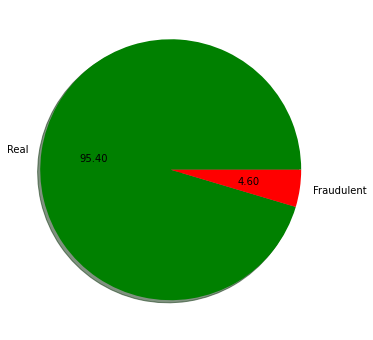

In [11]:
target = dl_train['fraudulent']
plt.pie(np.c_[len(target)-np.sum(target),np.sum(target)][0],labels=['Real','Fraudulent'],colors=['g','r'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

### NaN analysis & removal 

In [12]:
#labels = pd.read_csv('output/labels.csv', index_col=0)
#features = pd.read_csv('output/features.csv', index_col=0)

In [13]:
nan_labels = 100 * dl_train.apply(lambda x: pd.isna(x)).sum(axis=0) / len(dl_train)
print("There are", nan_labels.values[0], "nans in the labels")

There are 0.0 nans in the labels


In [3]:
## we need the auxiliary py file in order to compile these statistics' study

#from auxiliary import compute_nan_statistics
#compute_nan_statistics(dl_train)['% samples w/ nan']

In [14]:
data_columns = dl_train.columns
print(data_columns)

Index(['Id', 'job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'required_doughnuts_comsumption', 'fraudulent'],
      dtype='object')


We have the following data columns:
- Id: it is unique for every job add, should be introduced in the output file
- 'job_id': numeric, but should study if it contains information
- 'title': categorical, unique for every job add. Description, could study key words
- 'location': categorical could import just the first information, country (until the first , )
- 'department': categorical, study the number of categories (a lot of nans for the fraudulent)
- 'salary_range': numeric
- 'description': categorical, description
- 'requirements': categorical, description, a lot of times it is quite repetitive (with 'required_experience', 'required_education')
- 'benefits': categorical, description 
- 'telecommuting': numeric (boolean in fact!)
- 'has_company_logo': numeric (boolean in fact!)
- 'has_questions': numeric (boolean in fact!)
- 'employment_type': categorical (seems intuitive use a dummy, it looks like the categories are few)
- 'required_experience': categorical, could use dummies. More nans for the fraudulent!
- 'required_education': categorical, could use dummies. More nans for the fraudulent!
- 'industry': categorical, study, it could give us quite valuable information
- 'function': categorical, maybe dummy or hashing
- 'required_doughnuts_comsumption': numeric. It is a normal, study together and separated the fraudulent from the non-fraudulent. It also has a different distribution on the test dataset
- 'fraudulent': numeric, TARGET!

In [17]:
rows_with_nan =  dl_train.apply(lambda x: np.any(pd.isna(x)), axis=1)
print("There are", 100 * (len(rows_with_nan) - rows_with_nan.sum(axis=0)) / len(rows_with_nan),
      '% of rows without any nan!')

There are 4.120059656972408 % of rows without any nan!


In [21]:
rows_with_nan_fraud =  dl_fraudulent.apply(lambda x: np.any(pd.isna(x)), axis=1)
print("There are", 100 * (len(rows_with_nan_fraud) - rows_with_nan_fraud.sum(axis=0)) / len(rows_with_nan_fraud),
      '% of rows without any nan!')

There are 7.287449392712551 % of rows without any nan!


In [23]:
rows_with_nan

0        True
1        True
2        True
3        True
4        True
         ... 
10723    True
10724    True
10725    True
10726    True
10727    True
Length: 10728, dtype: bool

In [22]:
rows_with_nan_fraud

14       True
16       True
44       True
54       True
98       True
         ... 
10639    True
10641    True
10660    True
10679    True
10706    True
Length: 494, dtype: bool

In [48]:
nasum=dl_train.isnull().sum()
print(nasum)


print('---------------\n')
print('Fraudulent data: \n')
nasum_fraud=dl_fraudulent.isnull().sum()
print(nasum_fraud)

Id                                   0
job_id                               0
title                                0
location                           205
department                        7009
salary_range                      9019
company_profile                   1962
description                          1
requirements                      1629
benefits                          4368
telecommuting                        0
has_company_logo                     0
has_questions                        0
employment_type                   2058
required_experience               4239
required_education                4901
industry                          2939
function                          3870
required_doughnuts_comsumption       0
fraudulent                           0
dtype: int64
---------------

Fraudulent data: 

Id                                  0
job_id                              0
title                               0
location                           12
department         

In [49]:
print('------------------------------------- \n')
print('Percentage of nans values per feature: \n')
print(nasum/nasum.sum() * 100)

print('------------------------------------- \n')
print('Percentage of nans values per feature (fraudulent data): \n')
print(nasum_fraud/nasum_fraud.sum() * 100)

------------------------------------- 

Percentage of nans values per feature: 

Id                                 0.000000
job_id                             0.000000
title                              0.000000
location                           0.485782
department                        16.609005
salary_range                      21.372038
company_profile                    4.649289
description                        0.002370
requirements                       3.860190
benefits                          10.350711
telecommuting                      0.000000
has_company_logo                   0.000000
has_questions                      0.000000
employment_type                    4.876777
required_experience               10.045024
required_education                11.613744
industry                           6.964455
function                           9.170616
required_doughnuts_comsumption     0.000000
fraudulent                         0.000000
dtype: float64
------------------------

Let's study the relation between the number of nans of the whole data and of the fraudulent data. If the number is small, the proportion of nans in the fraudulent data is greater. 

Note there is only one nan in the description, and it is on the fraudulent sample.

Note there are a lot more nans in the 'company_profile' feature for the fraudulent nans (almost 20% more). This gives us a clue about the validity of this feature. Let's study how many of the fraudulent samples has nan in the description.

In [53]:
print((nasum/nasum.sum()) / (nasum_fraud/nasum_fraud.sum()) )

Id                                     NaN
job_id                                 NaN
title                                  NaN
location                          0.920152
department                        1.229716
salary_range                      1.320072
company_profile                   0.325164
description                       0.053863
requirements                      1.044549
benefits                          1.158974
telecommuting                          NaN
has_company_logo                       NaN
has_questions                          NaN
employment_type                   0.852686
required_experience               0.924386
required_education                1.027161
industry                          1.055347
function                          1.102900
required_doughnuts_comsumption         NaN
fraudulent                             NaN
dtype: float64


In [59]:
print('Percentage of samples from the fraudulent sample that has nan in the description: \n')
print(nasum_fraud['company_profile'] / len(dl_fraudulent) * 100)

Percentage of samples from the fraudulent sample that has nan in the description: 

65.78947368421053


In [60]:
print('Percentage of samples from the fraudulent sample that has nan in each feature: \n')
print(nasum_fraud / len(dl_fraudulent) * 100)

Percentage of samples from the fraudulent sample that has nan in each feature: 

Id                                 0.000000
job_id                             0.000000
title                              0.000000
location                           2.429150
department                        62.145749
salary_range                      74.493927
company_profile                   65.789474
description                        0.202429
requirements                      17.004049
benefits                          41.093117
telecommuting                      0.000000
has_company_logo                   0.000000
has_questions                      0.000000
employment_type                   26.315789
required_experience               50.000000
required_education                52.024291
industry                          30.364372
function                          38.259109
required_doughnuts_comsumption     0.000000
fraudulent                         0.000000
dtype: float64


In [61]:
print('Percentage of samples from the whole data set that has nan in each feature: \n')
print(nasum / len(dl_train) * 100)

Percentage of samples from the whole data set that has nan in each feature: 

Id                                 0.000000
job_id                             0.000000
title                              0.000000
location                           1.910887
department                        65.333706
salary_range                      84.069724
company_profile                   18.288591
description                        0.009321
requirements                      15.184564
benefits                          40.715884
telecommuting                      0.000000
has_company_logo                   0.000000
has_questions                      0.000000
employment_type                   19.183445
required_experience               39.513423
required_education                45.684191
industry                          27.395600
function                          36.073826
required_doughnuts_comsumption     0.000000
fraudulent                         0.000000
dtype: float64


In [62]:
print('Proportion of the percentage of samples from the whole data set that has nan in each feature: \n')
print((nasum_fraud / len(dl_fraudulent)) / (nasum / len(dl_train)) )

Proportion of the percentage of samples from the whole data set that has nan in each feature: 

Id                                      NaN
job_id                                  NaN
title                                   NaN
location                           1.271216
department                         0.951205
salary_range                       0.886097
company_profile                    3.597296
description                       21.716599
requirements                       1.119825
benefits                           1.009265
telecommuting                           NaN
has_company_logo                        NaN
has_questions                           NaN
employment_type                    1.371797
required_experience                1.265393
required_education                 1.138781
industry                           1.108367
function                           1.060578
required_doughnuts_comsumption          NaN
fraudulent                              NaN
dtype: float64


The main difference remains on the company_profile feature. 

Could try to study fraudulent vs real (instead of fraudulent vs whole data set):

In [63]:
dl_real = dl_train.loc[ dl_train[ 'fraudulent'] == 0]
#dl_real

print('---------------\n')
print('Fraudulent data: \n')
nasum_real=dl_real.isnull().sum()
print(nasum_fraud)
print('---------------\n')
print('Real data: \n')
print(nasum_real)
print('---------------\n')
print('Percentage of samples from the fraudulent sample that has nan in each feature: \n')
print(nasum_fraud / len(dl_fraudulent) * 100)
print('---------------\n')
print('Percentage of samples from the real sample that has nan in each feature: \n')
print(nasum_real / len(dl_real) * 100)
print('---------------\n')
print('Percentage of samples from the whole dataset that has nan in each feature: \n')
print(nasum / len(dl_train) * 100)

---------------

Fraudulent data: 

Id                                  0
job_id                              0
title                               0
location                           12
department                        307
salary_range                      368
company_profile                   325
description                         1
requirements                       84
benefits                          203
telecommuting                       0
has_company_logo                    0
has_questions                       0
employment_type                   130
required_experience               247
required_education                257
industry                          150
function                          189
required_doughnuts_comsumption      0
fraudulent                          0
dtype: int64
---------------

Real data: 

Id                                   0
job_id                               0
title                                0
location                           193
depar

I've studied nans per feature. But I may be interested on the nans per row, per sample. 

I'm going to add a new feature, that may include the number of nans that the sample has, because it may give us some information in relation to the fraudulent data 

In [67]:
## apply works with the entire data set, a want to work with a row 

sample_row = dl_train.loc[ dl_train[ 'Id'] <= 1]
## has 4 nans, let's count them
nasum_sample=sample_row.isnull().sum(axis=1)
print(nasum_sample)
sample_row
#sample_row.apply(lambda x: np.any(pd.isna(x)).sum(axis=0), axis=1)
#def add_nans(row):
    

0    4
1    4
dtype: int64


,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent
0,0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911,0
1,1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785,0


In [73]:
nasum_row=dl_train.isnull().sum(axis=1)
print(nasum_row)
print('---------------\n')
print('Data set mean of number of nans per row:')
print(np.mean(nasum_row))
print(' \n')
print('Data set max number of nans per row: \n')
print(np.max(nasum_row))
print('---------------\n')
nasum_row_fraud=dl_fraudulent.isnull().sum(axis=1)
print(nasum_row_fraud)
print('Fraudulent mean of number of nans per row:')
print(np.mean(nasum_row_fraud))
print(' \n')
print('Fraudulent max number of nans per row: \n')
print(np.max(nasum_row_fraud))

print('---------------\n')
nasum_row_real=dl_real.isnull().sum(axis=1)
print(nasum_row_real)
print('Real mean of number of nans per row:')
print(np.mean(nasum_row_real))
print(' \n')
print('Real max number of nans per row: \n')
print(np.max(nasum_row_real))


0        4
1        4
2        1
3        1
4        6
        ..
10723    1
10724    3
10725    4
10726    2
10727    5
Length: 10728, dtype: int64
---------------

Data set mean of number of nans per row:
3.9336316181953768
 

Data set max number of nans per row: 

11
---------------

14        3
16        8
44       10
54        7
98        9
         ..
10639     4
10641     8
10660     5
10679     5
10706     7
Length: 494, dtype: int64
Fraudulent mean of number of nans per row:
4.601214574898785
 

Fraudulent max number of nans per row: 

11
---------------

0        4
1        4
2        1
3        1
4        6
        ..
10723    1
10724    3
10725    4
10726    2
10727    5
Length: 10234, dtype: int64
Real mean of number of nans per row:
3.90140707445769
 

Real max number of nans per row: 

11


Should study the distributions carefully (i.e. is it a normal, deviation and mean)

In [74]:
dl_train_nanCount = dl_train
dl_train_nanCount['NaN_count'] = nasum_row
dl_train_nanCount

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent,NaN_count
0,0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,...,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911,0,4
1,1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,...,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785,0,4
2,2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,...,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-0.244369,0,1
3,3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,...,1,0,Full-time,Associate,Professional,Financial Services,Legal,-0.456807,0,1
4,4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,...,0,0,Part-time,NaN,NaN,Accounting,NaN,-0.217880,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,10723,11225,Production Artist,"US, TX, Austin",Design,NaN,"We're an emerging technology agency, and we bu...",Your hand develops our complete digital visual...,Requirements/Qualifications:1+ years of intera...,Why work for Mutual Mobile? We craft beautiful...,...,1,1,Full-time,Associate,Bachelor's Degree,Computer Software,Design,0.208937,0,1
10724,10724,7567,iOS Developer,"US, , New York",NaN,NaN,BlueLine Grid is transforming government commu...,BlueLine Grid is transforming government commu...,"BS/MS degree in Computer Science, Engineering ...","Full health, vision, dental benefitsNo vacatio...",...,1,0,Full-time,Mid-Senior level,Unspecified,NaN,Information Technology,-0.089956,0,3
10725,10725,9098,Graduates: English Teacher Abroad,"US, CA, Fremont",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it :-)Love travel...",University degree required. TEFL / TESOL / CEL...,See job description,...,1,0,Contract,NaN,Bachelor's Degree,Education Management,NaN,0.335414,0,4
10726,10726,4821,Senior IT Security Lead (SIEM / IDS),"US, CO, Colorado Springs",NaN,NaN,Roland &amp; Associates is a Corporate Recruit...,You will own the development of operational pl...,Job Role : Senior IT Security Lead (SIEM / ID...,Salary: Excellent package with full benefits a...,...,1,0,Full-time,Mid-Senior level,Associate Degree,Electrical/Electronic Manufacturing,Information Technology,-0.262851,0,2


Maybe the easiest model could include the numeric features (Id, job_id?, salary_range?, 'telecommuting', 'has_company_logo', 'has_questions', required_doughnuts_comsumption) + nanCount. 

We could try to study the more easy categorical ones.

Needs to be done:
- Study distributions of the numerical features, specially the correlations between the numerical we may choose for the basic model.
- Study the more categorical ones (dummies, or hasing?)
- All the model learning process

### Study of the numerical features' distributions in order to determine their correlations and relevancy

In [84]:
dl_numerical = dl_train[['Id', 'job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'required_doughnuts_comsumption','NaN_count', 'fraudulent']]
dl_numerical

,Id,job_id,salary_range,telecommuting,has_company_logo,has_questions,required_doughnuts_comsumption,NaN_count,fraudulent
0,0,5737,NaN,0,0,0,-0.410911,4,0
1,1,7107,NaN,0,1,1,-0.163785,4,0
2,2,11979,90000-100000,0,0,0,-0.244369,1,0
3,3,9375,NaN,0,1,0,-0.456807,1,0
4,4,1301,NaN,0,0,0,-0.217880,6,0
...,...,...,...,...,...,...,...,...,...
10723,10723,11225,NaN,0,1,1,0.208937,1,0
10724,10724,7567,NaN,0,1,0,-0.089956,3,0
10725,10725,9098,NaN,0,1,0,0.335414,4,0
10726,10726,4821,NaN,0,1,0,-0.262851,2,0


In [86]:
nasum_numerical=dl_numerical.isnull().sum()
print(nasum_numerical / (len(dl_numerical)))

Id                                0.000000
job_id                            0.000000
salary_range                      0.840697
telecommuting                     0.000000
has_company_logo                  0.000000
has_questions                     0.000000
required_doughnuts_comsumption    0.000000
NaN_count                         0.000000
fraudulent                        0.000000
dtype: float64


As we have already studied, we have that salary_range is one of the features with more NaNs. When studying the information separately, the real adds have slitghly more NaNs than the fraudulent ones in this case. We may therefore fill the NaN? Or just remove th feature? Just to start with, I may remove the feature, since the 85% of nans is a really high percentage. We can include this feature if in the future it has certain correlation with the target. 

However, we may mantain the sumand in the column of 'NaN_count', so the possible information given by the fact that it is nan may remain in our dataFrame.

In [87]:
dl_numerical = dl_train[['Id', 'job_id','telecommuting', 'has_company_logo', 'has_questions', 'required_doughnuts_comsumption','NaN_count', 'fraudulent']]
dl_numerical

,Id,job_id,telecommuting,has_company_logo,has_questions,required_doughnuts_comsumption,NaN_count,fraudulent
0,0,5737,0,0,0,-0.410911,4,0
1,1,7107,0,1,1,-0.163785,4,0
2,2,11979,0,0,0,-0.244369,1,0
3,3,9375,0,1,0,-0.456807,1,0
4,4,1301,0,0,0,-0.217880,6,0
...,...,...,...,...,...,...,...,...
10723,10723,11225,0,1,1,0.208937,1,0
10724,10724,7567,0,1,0,-0.089956,3,0
10725,10725,9098,0,1,0,0.335414,4,0
10726,10726,4821,0,1,0,-0.262851,2,0


In [88]:
corrMatrix = dl_numerical.corr()
print(corrMatrix)

                                      Id    job_id  telecommuting  \
Id                              1.000000 -0.001046      -0.009906   
job_id                         -0.001046  1.000000      -0.002566   
telecommuting                  -0.009906 -0.002566       1.000000   
has_company_logo                0.004134 -0.004621      -0.016388   
has_questions                  -0.003513 -0.081320       0.013603   
required_doughnuts_comsumption  0.002211  0.035473       0.021872   
NaN_count                      -0.002855  0.003642      -0.048947   
fraudulent                      0.011499  0.068504       0.032666   

                                has_company_logo  has_questions  \
Id                                      0.004134      -0.003513   
job_id                                 -0.004621      -0.081320   
telecommuting                          -0.016388       0.013603   
has_company_logo                        1.000000       0.228356   
has_questions                           0.2

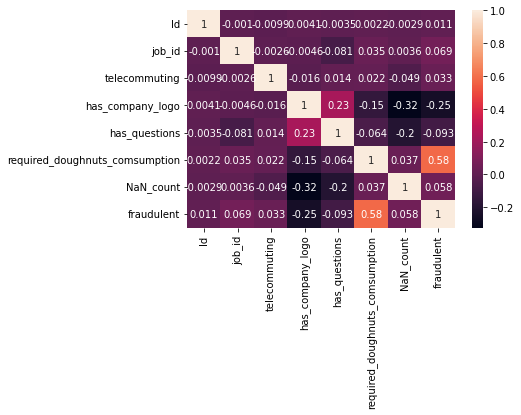

In [90]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

It actually looks like the most correlated distributions with the target are required_doughnuts_consumption and has_company_logo. 

Note, that has_company_logo is sligthly correlated with has_questions. The rest of the data seems to be quite uncorrelated, which indicates that we do not have redundant data. 

### Fitting and training models for the system using the numerical basic data set

Note that using the most basic dataset, considering the numeric features we have, we do not have issues with missing values, since we do not have nans. 

Then, let's split the training set in a new training and a validation data set. We may take the 30% of the data as the validation set, and train different models with the training set. 

In [99]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm


X_numerical = dl_train[['Id', 'job_id','telecommuting', 'has_company_logo', 'has_questions', 'required_doughnuts_comsumption','NaN_count']]
y_numerical = dl_train['fraudulent']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_numerical, y_numerical, test_size = 0.3, random_state=42)

## We could try to split again the training data set, and let the test be a fake test, and actually separate the training
# in a new training and a new validation (like in the NT1):

X_train2, X_validation, y_train2, y_validation = model_selection.train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

print('Training data set:', X_train2.shape)
print('Validation data set:', X_validation.shape)
print('Test data set:', X_test.shape)

## different training models:
model1 = neighbors.KNeighborsClassifier(n_neighbors=1)
model2 = neighbors.KNeighborsClassifier(n_neighbors=5)
model3 = neighbors.KNeighborsClassifier(n_neighbors=10)
model4 = tree.DecisionTreeClassifier()
model5 = GradientBoostingClassifier(random_state=42)
model6 = svm.SVC(C=10.0,gamma = 1e-5,random_state=42)
model7 = svm.SVC(C=100.0,gamma = 1e-5,random_state=42)
model8 = svm.SVC(C=1000.0,gamma = 1e-6,random_state=42)


## Let's fit them all using the training data set (train2)
model1.fit(X_train2, y_train2)
model2.fit(X_train2, y_train2)
model3.fit(X_train2, y_train2)
model4.fit(X_train2, y_train2)
model5.fit(X_train2, y_train2)
model6.fit(X_train2, y_train2)
model7.fit(X_train2, y_train2)
model8.fit(X_train2, y_train2)

## Predicting the y_hat for the training set:
yhat1 = model1.predict(X_train2)
yhat2 = model2.predict(X_train2)
yhat3 = model3.predict(X_train2)
yhat4 = model4.predict(X_train2)
yhat5 = model5.predict(X_train2)
yhat6 = model6.predict(X_train2)
yhat7 = model7.predict(X_train2)
yhat8 = model8.predict(X_train2)

print('---------------------------------')
print('Training accuracy for every model:\n')

print(metrics.accuracy_score(y_train2,yhat1))
print(metrics.accuracy_score(y_train2,yhat2))
print(metrics.accuracy_score(y_train2,yhat3))
print(metrics.accuracy_score(y_train2,yhat4))
print(metrics.accuracy_score(y_train2,yhat5))
print(metrics.accuracy_score(y_train2,yhat6))
print(metrics.accuracy_score(y_train2,yhat7))
print(metrics.accuracy_score(y_train2,yhat8))



Training data set: (5256, 7)
Validation data set: (2253, 7)
Test data set: (3219, 7)
----------------
Training accuracy for every model:

1.0
0.9684170471841704
0.9667047184170472
1.0
0.9996194824961948
0.9811643835616438
0.993531202435312
0.9722222222222222


Models 2,3, and 8 could be dropped, they work really bad with the training data set already!
Let's continue the exploration through the validation set, in order to confirm it.

In [100]:
## Predicting the y_hat for the validation set:
yhat_val1 = model1.predict(X_validation)
yhat_val2 = model2.predict(X_validation)
yhat_val3 = model3.predict(X_validation)
yhat_val4 = model4.predict(X_validation)
yhat_val5 = model5.predict(X_validation)
yhat_val6 = model6.predict(X_validation)
yhat_val7 = model7.predict(X_validation)
yhat_val8 = model8.predict(X_validation)

print('---------------------------------')
print('Validation accuracy for every model:\n')

print(metrics.accuracy_score(y_validation,yhat_val1))
print(metrics.accuracy_score(y_validation,yhat_val2))
print(metrics.accuracy_score(y_validation,yhat_val3))
print(metrics.accuracy_score(y_validation,yhat_val4))
print(metrics.accuracy_score(y_validation,yhat_val5))
print(metrics.accuracy_score(y_validation,yhat_val6))
print(metrics.accuracy_score(y_validation,yhat_val7))
print(metrics.accuracy_score(y_validation,yhat_val8))


---------------------------------
Validation accuracy for every model:

0.935641367066134
0.9573901464713716
0.9591655570350643
0.9822458943630714
0.9862405681313804
0.9498446515756769
0.9285397248113626
0.9582778517532179


Taking a look at the validation accuracies, we would choose models 4 or 5: 
- model4 = tree.DecisionTreeClassifier()
- model5 = GradientBoostingClassifier(random_state=42)
Let' actually check what would happen with the assumed test data set.

In [101]:
## Predicting the y_hat for the test set:
yhat_test1 = model1.predict(X_test)
yhat_test2 = model2.predict(X_test)
yhat_test3 = model3.predict(X_test)
yhat_test4 = model4.predict(X_test)
yhat_test5 = model5.predict(X_test)
yhat_test6 = model6.predict(X_test)
yhat_test7 = model7.predict(X_test)
yhat_test8 = model8.predict(X_test)

print('---------------------------------')
print('Test accuracy for every model:\n')

print(metrics.accuracy_score(y_test,yhat_test1))
print(metrics.accuracy_score(y_test,yhat_test2))
print(metrics.accuracy_score(y_test,yhat_test3))
print(metrics.accuracy_score(y_test,yhat_test4))
print(metrics.accuracy_score(y_test,yhat_test5))
print(metrics.accuracy_score(y_test,yhat_test6))
print(metrics.accuracy_score(y_test,yhat_test7))
print(metrics.accuracy_score(y_test,yhat_test8))


---------------------------------
Test accuracy for every model:

0.9397328362845604
0.9627213420316869
0.9608574091332712
0.9829139484311898
0.9878844361602982
0.9487418452935694
0.9251320285803044
0.9611680646163405


We were right, models 4 and 5 are the most accurate. Forced to choose one, I would go with model 5, which is slightly better. Applying this model to the test data set I get the results:

### Study and prediction on the test data set

In [103]:
dl_test=pd.read_csv('./test.csv')
dl_test.head()

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,doughnuts_comsumption
0,0,14155,Home Based Typist/ Data Entry Clerk,"ZA, WC, Oudtshoorn",NaN,NaN,NaN,We have several openings available in this are...,Applicants should have a computer with interne...,"Averaging R2,500 per week depending on if you ...",0,0,0,NaN,NaN,NaN,NaN,NaN,1.763896
1,1,6567,Call Center Representative I,"US, TX, AUSTIN",CALL CENTER,28000-32000,As the industry’s largest supply contracting c...,The Call Center Representative I will provide ...,1-2 years customer serviceExcellent communicat...,competitive salaries and comprehensive benefit...,0,1,1,Full-time,Associate,High School or equivalent,Consumer Services,Customer Service,0.285890
2,2,5930,Chief Accountant,"RO, B, Bucharrest",Accounting,NaN,At The Practice Group (TPG) we provide clients...,TPG is searching a Chief Accountant for one of...,Good knowledge of SAPFluency in EnglishUnivers...,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting,Accounting/Auditing,-0.700898
3,3,11085,Office Services Associate,"US, CA, San Jose",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Office Services Associate will be based in...,Required Qualifications: Ability to work with ...,NaN,0,1,0,Full-time,Associate,High School or equivalent,Banking,Customer Service,-2.235754
4,4,8381,Need Oracle Fusion HCM Resource,"US, OH, North Canton",NaN,NaN,Infolob Solutions is a leader in Managed IT se...,Oracle Fusion HCM ResourceLocation - North Can...,1. Minimum of one project (prefer 2 or mor...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,-1.154964


In [107]:
nasum_features_test=dl_test.isnull().sum()
print(nasum_features_test / (len(dl_test)))
print('----------------')
print(nasum / (len(dl_train)))

Id                       0.000000
job_id                   0.000000
title                    0.000000
location                 0.019715
department               0.634508
salary_range             0.837947
company_profile          0.188199
description              0.000000
requirements             0.149049
benefits                 0.397371
telecommuting            0.000000
has_company_logo         0.000000
has_questions            0.000000
employment_type          0.197567
required_experience      0.393037
required_education       0.447987
industry                 0.274609
function                 0.361437
doughnuts_comsumption    0.000000
dtype: float64
----------------
Id                                0.000000
job_id                            0.000000
title                             0.000000
location                          0.019109
department                        0.653337
salary_range                      0.840697
company_profile                   0.182886
description          

The distribution of the nans is almost the same in both data sets!!!!

In [122]:
nasum_test=dl_test.isnull().sum(axis=1)
dl_test['NaN_count']= nasum_test
dl_test

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,doughnuts_comsumption,NaN_count
0,0,14155,Home Based Typist/ Data Entry Clerk,"ZA, WC, Oudtshoorn",NaN,NaN,NaN,We have several openings available in this are...,Applicants should have a computer with interne...,"Averaging R2,500 per week depending on if you ...",0,0,0,NaN,NaN,NaN,NaN,NaN,1.763896,8
1,1,6567,Call Center Representative I,"US, TX, AUSTIN",CALL CENTER,28000-32000,As the industry’s largest supply contracting c...,The Call Center Representative I will provide ...,1-2 years customer serviceExcellent communicat...,competitive salaries and comprehensive benefit...,0,1,1,Full-time,Associate,High School or equivalent,Consumer Services,Customer Service,0.285890,0
2,2,5930,Chief Accountant,"RO, B, Bucharrest",Accounting,NaN,At The Practice Group (TPG) we provide clients...,TPG is searching a Chief Accountant for one of...,Good knowledge of SAPFluency in EnglishUnivers...,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting,Accounting/Auditing,-0.700898,2
3,3,11085,Office Services Associate,"US, CA, San Jose",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Office Services Associate will be based in...,Required Qualifications: Ability to work with ...,NaN,0,1,0,Full-time,Associate,High School or equivalent,Banking,Customer Service,-2.235754,3
4,4,8381,Need Oracle Fusion HCM Resource,"US, OH, North Canton",NaN,NaN,Infolob Solutions is a leader in Managed IT se...,Oracle Fusion HCM ResourceLocation - North Can...,1. Minimum of one project (prefer 2 or mor...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,-1.154964,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,7147,10956,Customer Service Associate,"GB, LND, London",NaN,NaN,We take the hassle out of finding and booking ...,About UsWe take the hassle out of finding and ...,About YouYou must have previous customer servi...,BenefitsSalary is £16-20k depending on experie...,0,1,0,Full-time,NaN,NaN,Consumer Goods,Customer Service,0.887867,4
7148,7148,17290,QA Engineer,"IL, ,",NaN,NaN,Xplenty is all about making complex stuff look...,"As a QA engineer, you will be responsible for ...",You have to love QA and feel a compulsion to t...,About Xplenty:Xplenty is all about making comp...,0,0,1,Full-time,NaN,NaN,NaN,NaN,-0.789032,6
7149,7149,5193,HGV Class 1 - Trunk Driver,"GB, ,",NaN,NaN,With our head office in Radstock the Unique Gr...,We urgently require both Day and Night Trunker...,HGV/LGV Class 1 license.Digi Tacho.,Regular ongoing work.Various start times.Good ...,0,1,1,NaN,NaN,NaN,NaN,NaN,-2.359534,7
7150,7150,12173,Firmware Engineer - C# Visual Basic ASM SQL - FL,"US, FL, Daytona",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Firmware Engineer is required havi...,Experience in programming microcontrollersEmbe...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,-1.317668,7


In [125]:
X_numerical_test = dl_test[['Id', 'job_id','telecommuting', 'has_company_logo', 'has_questions', 'doughnuts_comsumption', 'NaN_count']]
X_numerical_test

,Id,job_id,telecommuting,has_company_logo,has_questions,doughnuts_comsumption,NaN_count
0,0,14155,0,0,0,1.763896,8
1,1,6567,0,1,1,0.285890,0
2,2,5930,0,1,1,-0.700898,2
3,3,11085,0,1,0,-2.235754,3
4,4,8381,0,1,0,-1.154964,8
...,...,...,...,...,...,...,...
7147,7147,10956,0,1,0,0.887867,4
7148,7148,17290,0,0,1,-0.789032,6
7149,7149,5193,0,1,1,-2.359534,7
7150,7150,12173,0,0,0,-1.317668,7


In [126]:
yhat_t4 = model4.predict(X_numerical_test)
yhat_t5 = model5.predict(X_numerical_test)

/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- doughnuts_comsumption
Feature names seen at fit time, yet now missing:
- required_doughnuts_comsumption

  warnings.warn(message, FutureWarning)
/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- doughnuts_comsumption
Feature names seen at fit time, yet now missing:
- required_doughnuts_comsumption

  warnings.warn(message, FutureWarning)


In [127]:
## I think there is a problem with the name of the column of the fcking donuts
yhat_t5

array([1, 0, 0, ..., 0, 0, 1])

### Studying training data set, from statistics notions

Trying regression multiple with different features from the training set. Let's first consider the numerical values, and let's include the boolean columns too

- Job ID
- telecommuting (True if telework is available)
- has company logo (True if the ad shows the logo)
- has questions (True if screeing questions are present)
- required doughnuts comsumption: normalized average amount of doughnuts that the employee is expected to consume every day.

The numerical columns are all boolean, and the doughnut thing, we may prefer to represent the data using boxplots. 